In [1]:
import matplotlib.pyplot as plt
import math
import random
import statistics as st

In [2]:
%matplotlib inline

In [3]:
def roll_die():
    return random.randint(1,6)


class Player:
    """
    Responsibilities:
    Keep track of score and number of rolls
    Determine if player should roll again based on current state
    Run through a complete turn
    - 
    """
    
    def __init__(self):
        self.points = 0
        self.reset()
    
    def reset(self):
        self.points = 0
        self.rolls = 0
    
    def should_roll_again(self):
        """
        Returns True if the Player should roll again, False otherwise
        This method should probably be overridden with subclasses to do more complex stuff!
        """
        return False
    
    def play_turn(self):
        self.reset()
        
        while True:
            roll = roll_die()
            self.rolls += 1
            if roll == 1:
                break
            else:
                self.points += roll
            if not self.should_roll_again():
                break
        
        return self.points
    
    
   
    


In [5]:
class CautiousPlayer(Player):
    # You only need to roll 
        def should_roll_again(self):
            if self.rolls < 2:
                return True
            else:
                return False
        
class AggressivePlayer(Player):
        def should_roll_again(self):
            if self.rolls < 5:
                return True
            else:
                return False

In [6]:
class PigSolitaireGame:
    """
    Responsibilities:
    Run a game
    Keep track of total points over 7 turns
    
    Collaborators:
    Player (or subclass)
    """
    def __init__(self, player):
        self.player = player
    
    def play_game(self):
        total_points = 0
        for _ in range(7):
            total_points += self.player.play_turn()
        
        return total_points

In [7]:

game = PigSolitaireGame(CautiousPlayer())
game.play_game()

cautious_data = [game.play_game() for x in range(1000)]
x_values = [x for x in range(1000)]

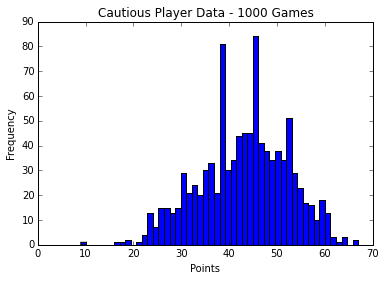

In [8]:

plt.hist(cautious_data, bins = 50)
ymin, ymax = plt.ylim()

plt.title("Cautious Player Data - 1000 Games")
plt.xlabel("Points ")
plt.ylabel("Frequency")
plt.show()

In [9]:
game = PigSolitaireGame(AggressivePlayer())
game.play_game()

aggressive_data = [game.play_game() for x in range(1000)]
x_values = [x for x in range(1000)]

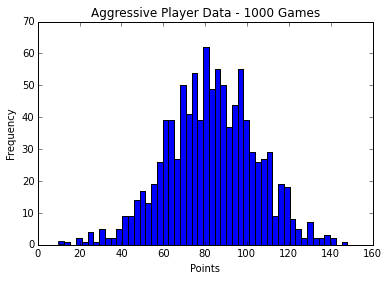

In [10]:
plt.hist(aggressive_data, bins = 50)
ymin, ymax = plt.ylim()

plt.title("Aggressive Player Data - 1000 Games")
plt.xlabel("Points ")
plt.ylabel("Frequency")
plt.show()